In [1]:
# Asteroid True Trajectory Plot and CSV Parser
# Extends previous code to fetch orbital elements for a list of asteroid IDs and save them as CSV for analysis.

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIGURATION ===
api_key = "8rYRbfxJu447RUeWzEpsqXAbgMnesrP5XiUBo6DJ"  # Replace with your NASA API key
asteroid_ids = ["3542519", "2000433", "2021277"]  # Replace with desired asteroid IDs

# === 1. Fetch Orbital Elements and Build CSV ===
asteroid_data_list = []
for asteroid_id in asteroid_ids:
    url = f"https://api.nasa.gov/neo/rest/v1/neo/{asteroid_id}"
    response = requests.get(url, params={"api_key": api_key})
    data = response.json()

    orbital_data = data["orbital_data"]
    asteroid_info = {
        "id": data.get("id"),
        "name": data.get("name"),
        "absolute_magnitude_h": data.get("absolute_magnitude_h"),
        "is_potentially_hazardous_asteroid": data.get("is_potentially_hazardous_asteroid"),
        "epoch_osculation": orbital_data.get("epoch_osculation"),
        "eccentricity": orbital_data.get("eccentricity"),
        "semi_major_axis": orbital_data.get("semi_major_axis"),
        "inclination": orbital_data.get("inclination"),
        "ascending_node_longitude": orbital_data.get("ascending_node_longitude"),
        "perihelion_argument": orbital_data.get("perihelion_argument"),
        "mean_anomaly": orbital_data.get("mean_anomaly"),
        "orbital_period": orbital_data.get("orbital_period"),
        "perihelion_distance": orbital_data.get("perihelion_distance"),
        "aphelion_distance": orbital_data.get("aphelion_distance"),
    }
    asteroid_data_list.append(asteroid_info)

# Save all asteroid orbital data to CSV
df = pd.DataFrame(asteroid_data_list)
df.to_csv("asteroid_orbital_dataset.csv", index=False)
print("All asteroid orbital data saved to asteroid_orbital_dataset.csv")

All asteroid orbital data saved to asteroid_orbital_dataset.csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3 non-null      object 
 1   name                               3 non-null      object 
 2   absolute_magnitude_h               3 non-null      float64
 3   is_potentially_hazardous_asteroid  3 non-null      bool   
 4   epoch_osculation                   3 non-null      object 
 5   eccentricity                       3 non-null      object 
 6   semi_major_axis                    3 non-null      object 
 7   inclination                        3 non-null      object 
 8   ascending_node_longitude           3 non-null      object 
 9   perihelion_argument                3 non-null      object 
 10  mean_anomaly                       3 non-null      object 
 11  orbital_period                     3 non-null      object 
 12

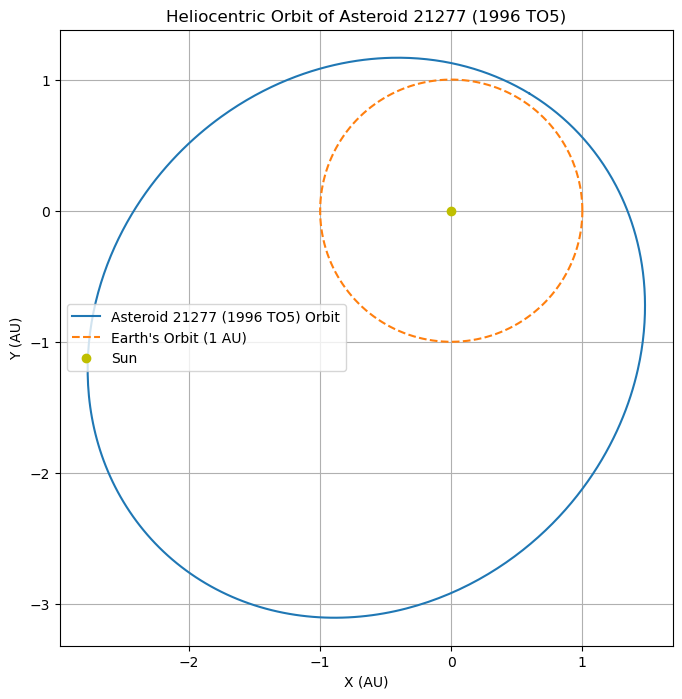

In [7]:
# Select the first asteroid's orbital elements for plotting
asteroid = df.iloc[2]
a = float(asteroid["semi_major_axis"])
e = float(asteroid["eccentricity"])
i = np.radians(float(asteroid["inclination"]))
Omega = np.radians(float(asteroid["ascending_node_longitude"]))
omega = np.radians(float(asteroid["perihelion_argument"]))

# Generate orbit
nu = np.linspace(0, 2 * np.pi, 500)
r = (a * (1 - e ** 2)) / (1 + e * np.cos(nu))
x = (np.cos(Omega) * np.cos(omega + nu) - np.sin(Omega) * np.sin(omega + nu) * np.cos(i)) * r
y = (np.sin(Omega) * np.cos(omega + nu) + np.cos(Omega) * np.sin(omega + nu) * np.cos(i)) * r

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, y, label=f"Asteroid {asteroid['name']} Orbit")
theta = np.linspace(0, 2 * np.pi, 500)
ax.plot(np.cos(theta), np.sin(theta), '--', label="Earth's Orbit (1 AU)")
ax.plot(0, 0, 'yo', label='Sun')
ax.set_aspect('equal')
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_title(f"Heliocentric Orbit of Asteroid {asteroid['name']}")
ax.legend()
ax.grid(True)
plt.show()

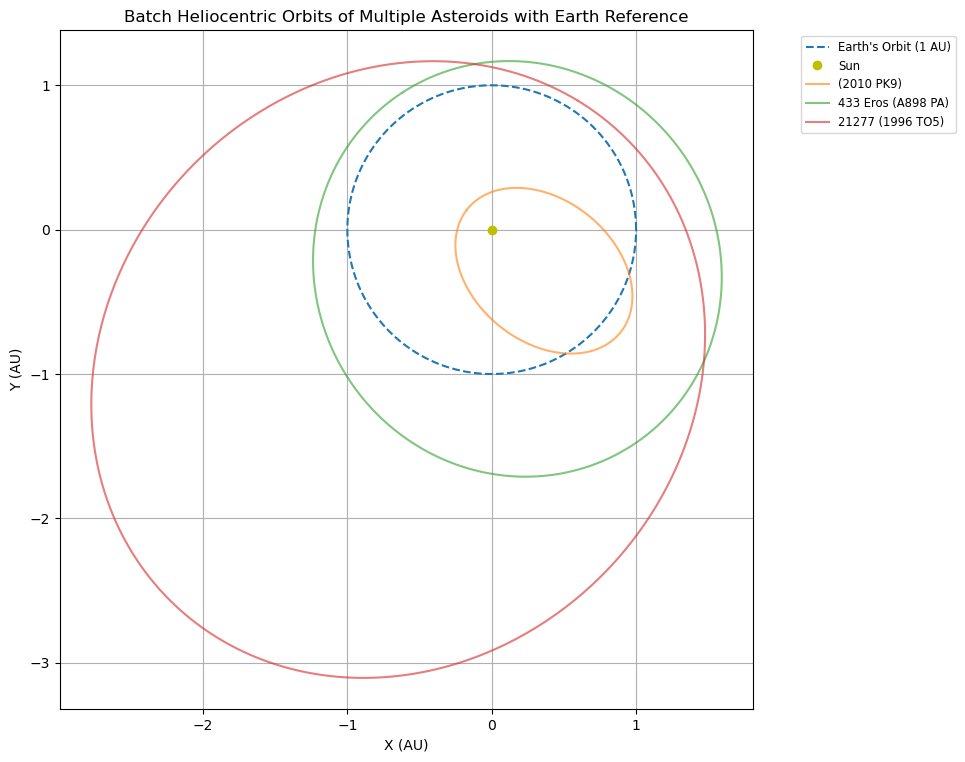

In [9]:
# Setup plot
fig, ax = plt.subplots(figsize=(10, 10))
theta = np.linspace(0, 2 * np.pi, 500)
ax.plot(np.cos(theta), np.sin(theta), '--', label="Earth's Orbit (1 AU)")
ax.plot(0, 0, 'yo', label='Sun')

# Loop over each asteroid and plot its orbit
for idx, asteroid in df.iterrows():
    try:
        a = float(asteroid["semi_major_axis"])
        e = float(asteroid["eccentricity"])
        i = np.radians(float(asteroid["inclination"]))
        Omega = np.radians(float(asteroid["ascending_node_longitude"]))
        omega = np.radians(float(asteroid["perihelion_argument"]))

        nu = np.linspace(0, 2 * np.pi, 500)
        r = (a * (1 - e ** 2)) / (1 + e * np.cos(nu))

        x = (np.cos(Omega) * np.cos(omega + nu) - np.sin(Omega) * np.sin(omega + nu) * np.cos(i)) * r
        y = (np.sin(Omega) * np.cos(omega + nu) + np.cos(Omega) * np.sin(omega + nu) * np.cos(i)) * r

        ax.plot(x, y, alpha=0.6, label=f"{asteroid['name']}")
    except Exception as ex:
        print(f"Skipped asteroid {asteroid['name']} due to error: {ex}")

# Final plot formatting
ax.set_aspect('equal')
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_title('Batch Heliocentric Orbits of Multiple Asteroids with Earth Reference')
ax.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.3, 1))
ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
'''
Here is what your current Python code does:

✅ **1️⃣ Reads your saved `asteroid_orbital_dataset.csv`** containing orbital elements for multiple asteroids you previously pulled from the NASA NEO API.

✅ **2️⃣ Selects the first asteroid in the CSV** for plotting.

✅ **3️⃣ Extracts its orbital elements:**
- Semi-major axis (a)
- Eccentricity (e)
- Inclination (i)
- Longitude of ascending node (Ω)
- Argument of perihelion (ω)

✅ **4️⃣ Generates the asteroid’s true heliocentric orbit:**
Using parametric equations and orbital geometry, it computes `x` and `y` positions across 0–360° to visualize the orbit in the ecliptic plane.

✅ **5️⃣ Plots:**
- The asteroid’s orbit
- Earth’s orbit as a 1 AU reference circle
- The Sun at the center

✅ **Purpose:** This enables you to visualize the true shape, size, and orientation of an asteroid’s orbit in context with Earth’s orbit for learning and analysis.

---

## 🚀 Future Additions You Could Make:

✅ **Batch Orbit Plotting:** Plot orbits for all asteroids in your CSV for comparative orbital analysis.

✅ **Mark Current Position:** Compute and plot the asteroid’s current position on its orbit using `mean_anomaly` and Kepler’s equation.

✅ **3D Orbit Visualization:** Use `plotly` or `matplotlib` 3D to show inclination and orbit tilt in true 3D space.

✅ **Animation:** Animate the asteroid’s movement around the Sun and Earth’s orbit to visualize potential close approaches.

✅ **Earth-Asteroid Distance Tracking:** Compute and plot the asteroid’s distance to Earth over time using both orbits and orbital periods.

✅ **Hazard Analysis Dashboard:** Combine orbital parameters and miss distance data to create Power BI/Tableau dashboards for identifying high-risk NEOs.

✅ **Integration with Your 7-Day Feed:** Cross-reference close approaches with orbital plots to study how orbit characteristics relate to near-term close approaches.

✅ **Export Enhanced CSVs:** Enrich your CSV with perihelion, aphelion, orbital period, and computed current positions for advanced filtering and dashboard visuals.

✅ **Learning Deep Dives:** Explore orbital perturbations, resonances with Earth’s orbit, and gravitational influences for advanced modeling.

---

⚡ Let me know which of these enhancements you would like to implement next to continue building your portfolio and practical orbital analysis skills efficiently.

'''